##Importing Required Libraries

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential


##Loading the MNIST dataset

In [21]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()



##Preprocessing and Feature Scaling wrt 255 pixels

In [23]:
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


##Preparing the Dataset

In [24]:

train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)



##Sequential 5 layers NN model

In [25]:
model = Sequential()
model.add(Dense(units=256,activation="relu",input_shape=(784,)))
model.add(Dropout(0.4))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=10,activation="softmax"))

In [26]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])



In [27]:
H=model.fit(train_x,train_y,batch_size=2048,epochs=100)

Epoch 1/100
30/30 [==============================] - 2s 7ms/step - loss: 2.2753 - accuracy: 0.1785
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 1.8823 - accuracy: 0.3474
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 1.2603 - accuracy: 0.5428
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 0.9461 - accuracy: 0.6609
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.7850 - accuracy: 0.7336
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6695 - accuracy: 0.7900
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 0.5856 - accuracy: 0.8254
Epoch 8/100
30/30 [==============================] - 0s 7ms/step - loss: 0.5233 - accuracy: 0.8495
Epoch 9/100
30/30 [==============================] - 0s 7ms/step - loss: 0.4779 - accuracy: 0.8665
Epoch 10/100
30/30 [==============================] - 0s 7ms/step - loss: 0.4380 - accuracy: 0.8776
Epoch 11/

##Accuracy evaluation

In [28]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=1024)

print("Accuracy: ",accuracy[1])

10/10 [==============================] - 0s 6ms/step - loss: 0.0985 - accuracy: 0.9766
Accuracy:  0.9765999913215637


In [29]:
H.history.keys() # To check which information does it contain

dict_keys(['loss', 'accuracy'])

In [30]:
H.history['accuracy']

[0.17845000326633453,
 0.34736666083335876,
 0.5427500009536743,
 0.6609333157539368,
 0.7336000204086304,
 0.7900166511535645,
 0.8254333138465881,
 0.8495166897773743,
 0.8664666414260864,
 0.8776000142097473,
 0.8894500136375427,
 0.8983833193778992,
 0.9040166735649109,
 0.9102333188056946,
 0.9150333404541016,
 0.918916642665863,
 0.9247999787330627,
 0.9265499711036682,
 0.9306333065032959,
 0.9324666857719421,
 0.9341833591461182,
 0.9388166666030884,
 0.9397000074386597,
 0.9427333474159241,
 0.944599986076355,
 0.9454833269119263,
 0.9469333291053772,
 0.9495833516120911,
 0.9508500099182129,
 0.9524999856948853,
 0.9524333477020264,
 0.9527833461761475,
 0.9551500082015991,
 0.9557999968528748,
 0.9557333588600159,
 0.9577166438102722,
 0.9593499898910522,
 0.9585999846458435,
 0.9599166512489319,
 0.9606500267982483,
 0.961983323097229,
 0.9629166722297668,
 0.9627500176429749,
 0.9648500084877014,
 0.9639999866485596,
 0.9646666646003723,
 0.965316653251648,
 0.965683341026

In [31]:
import plotly.express as px

px.line(y=H.history['accuracy'],title='Accuracy')

In [32]:
px.line(y=H.history['loss'],title='Loss')

## Predictions for your images
  Use self written digits by uploading on Google Drive to predict and validate mode results




In [33]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [34]:
%cd /content/drive/My Drive/ #specify file path

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3


## Prediction Function

In [37]:

def predict(img_path,model,con_dest='converted_img.jpg',threshold=135):
    num=cv2.imread(img_path)
    num=cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
    #num.resize(28,28)
    (thresh, num) = cv2.threshold(num, threshold, 255, cv2.THRESH_BINARY_INV)


    cv2.imwrite(con_dest,num)

    img = image.load_img(con_dest,color_mode = "grayscale",target_size=(28,28))
    plt.imshow(img)
    plt.title("Converted Image for Prediction")
    plt.show()
    img = image.img_to_array(img)
    test_img = (img.reshape((1,784)))/255.0
    ans=model.predict(test_img)

    print('Predictions for each class', ans)
    print('Predicted value is '+ str(np.argmax(ans)))

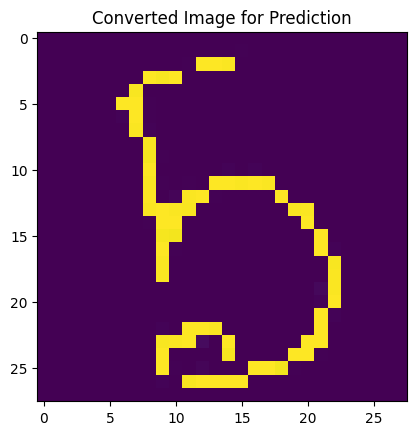

1/1 [==============================] - 0s 129ms/step
Predictions for each class [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted value is 3


In [38]:
predict('imagepath',model=model,con_dest='imagepath') #specify image path